## Decision tree

This is my first exercise inspered by [this course](https://agorapulse.udemy.com/data-science-and-machine-learning-with-python-hands-on/learn/v4/)

In [1]:
import numpy as np
import pandas as pd
from sklearn import tree

input_file = "/Users/fede/development/data-science/titanic/titanic/train.csv"
df = pd.read_csv(input_file, header = 0)

In [2]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Mapping values

In [3]:
d = {'male': 1, 'female': 0}
df['Sex'] = df['Sex'].map(d)
#(C=Cherbourg, Q=Queenstown, S=Southampton)
c = {'C': 0,'Q':1,'S':2}
df['Embarked'] = df['Embarked'].map(c)

# Remove unnecessary values

In [4]:
df = df.drop('Name', 1)
df = df.drop('Ticket', 1)
df = df.drop('Cabin', 1)
df = df.drop('PassengerId', 1)

In [5]:
df = df[['Pclass', 'Sex', 'Age','SibSp','Parch','Fare', 'Survived']]

df.head(10)

,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
0,3,1,22.0,1,0,7.2500,0
1,1,0,38.0,1,0,71.2833,1
2,3,0,26.0,0,0,7.9250,1
3,1,0,35.0,1,0,53.1000,1
4,3,1,35.0,0,0,8.0500,0
5,3,1,NaN,0,0,8.4583,0
6,1,1,54.0,0,0,51.8625,0
7,3,1,2.0,3,1,21.0750,0
8,3,0,27.0,0,2,11.1333,1
9,2,0,14.0,1,0,30.0708,1


In [6]:
features = list(df.columns[:6])
features

['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']

# Build decision tree

In [7]:
df1 = df.astype(object).replace(np.nan, '-1')

y = df1["Survived"]
X = df1[features]

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X,y)


# Create graph

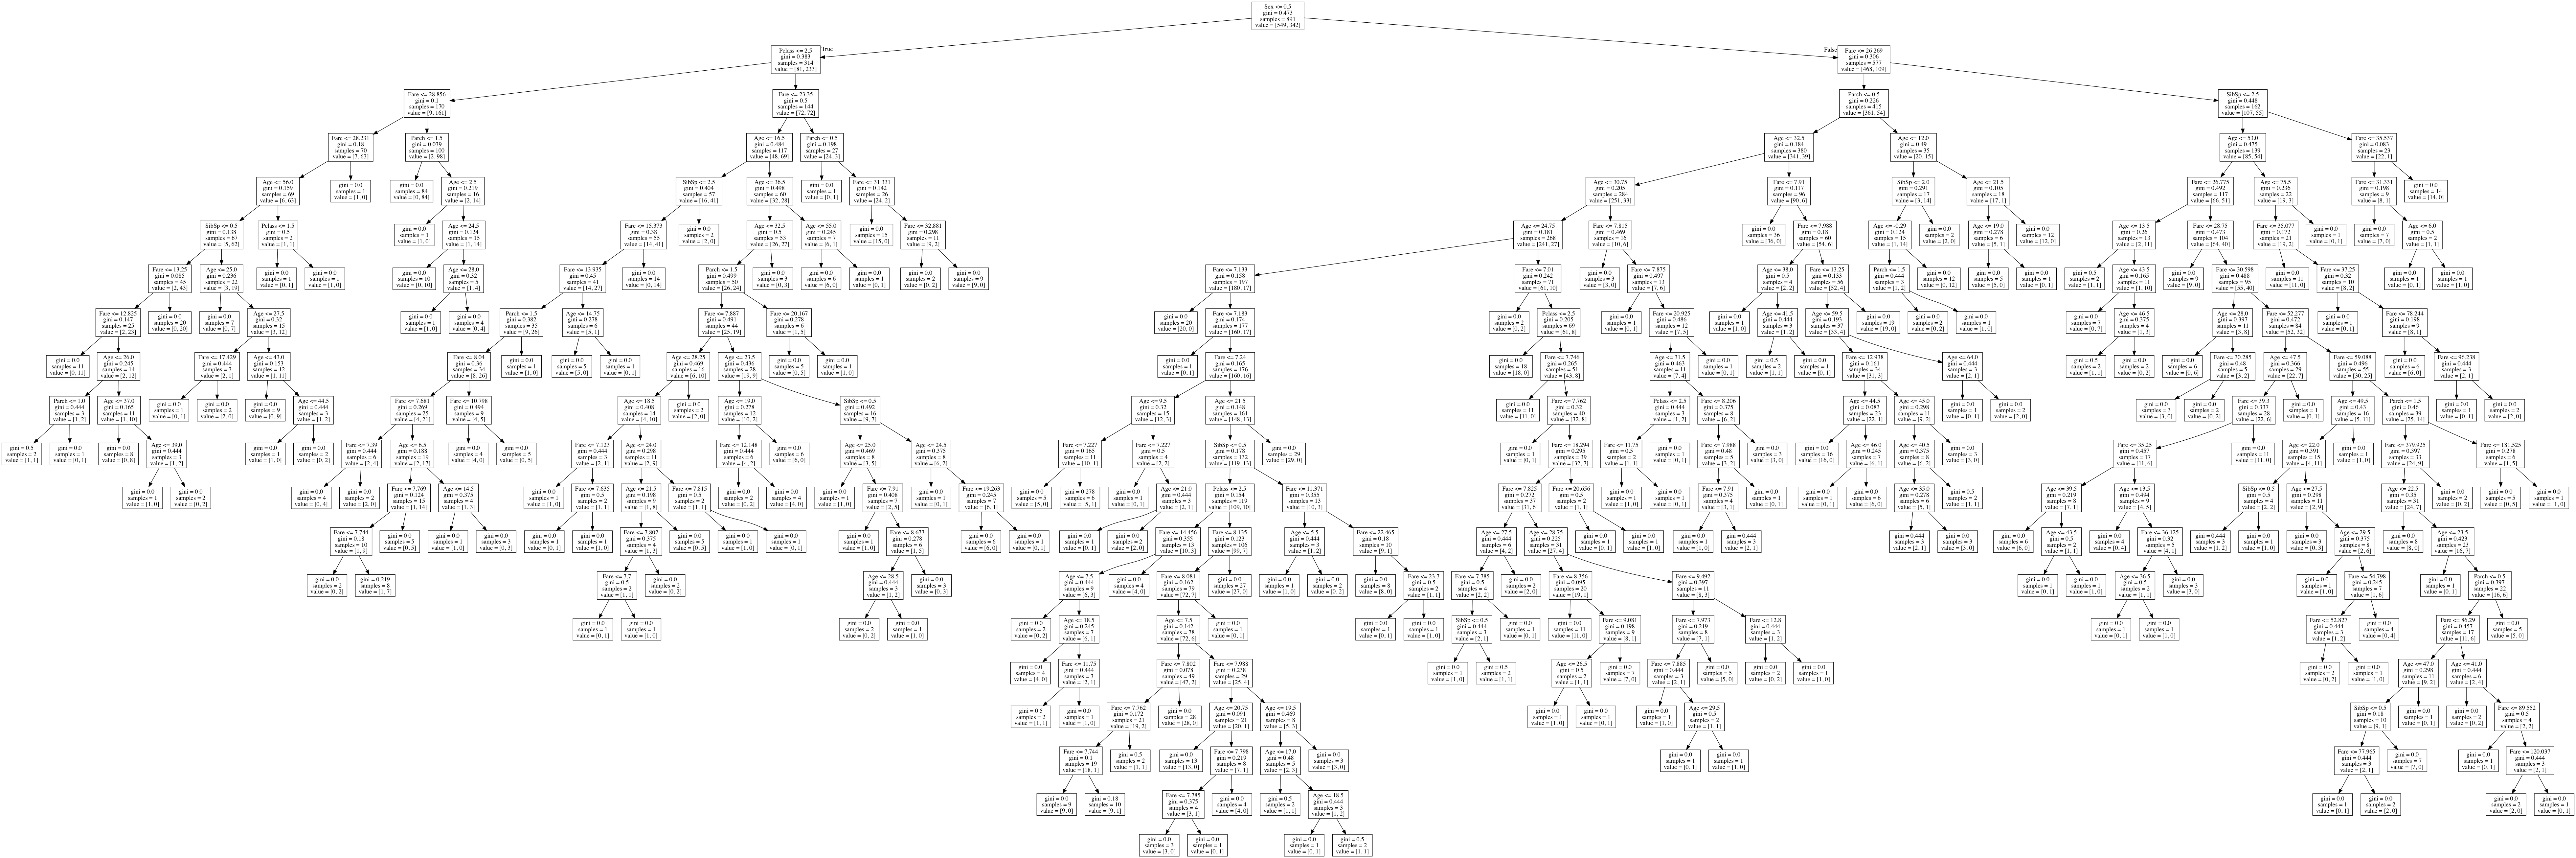

In [8]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
import pydotplus

dot_data = StringIO()  
tree.export_graphviz(clf, out_file=dot_data,  
                         feature_names=features)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

# Compare with test cases

In [9]:
#Read train file

input_file_test = "/Users/fede/development/data-science/titanic/titanic/test.csv"
df_test = pd.read_csv(input_file, header = 0)

# map values
df_test['Sex'] = df_test['Sex'].map(d)
df_test['Embarked'] = df_test['Embarked'].map(c)

#remove unnecessary values
df_test = df_test.drop('Name', 1)
df_test = df_test.drop('Ticket', 1)
df_test = df_test.drop('Cabin', 1)
df_test = df_test.drop('PassengerId', 1)


df_test = df_test[['Pclass', 'Sex', 'Age','SibSp','Parch','Fare', 'Survived']]

df_test_survived = df_test.loc[df_test['Survived'] ==1]
df_test_victims = df_test.loc[df_test['Survived'] ==0]


df_test_survived = df_test_survived[['Pclass', 'Sex', 'Age','SibSp','Parch','Fare']]
df_test_victims = df_test_victims[['Pclass', 'Sex', 'Age','SibSp','Parch','Fare']]






# Survivors


In [10]:
df_test_survived = df_test_survived.astype(object).replace(np.nan, '-1')

survivors = clf.predict(df_test_survived)


In [11]:
from collections import Counter

total = Counter(survivors)
percetange_of_error_survivors =  total[0] * 100 / total[1]
percetange_of_error_survivors


4.2682926829268295

# Victims

In [13]:
df_test_victims = df_test_victims.astype(object).replace(np.nan, '-1')

victims = clf.predict(df_test_victims)

total = Counter(victims)
percetange_of_error_victims =  total[1] * 100 / total[0]
percetange_of_error_victims

0.3656307129798903